![](covid.jpg)
 
    
**Inteligencia Artificial:**

**Proyecto COVID ANALISI DE DATOS UNIDAD 6**

**Nombre del docente:**

**Jose Gabriel Rodriguez Rivas**

**Nombre de los alumnos:**

**VERGARA HERNANDEZ JESUS ALEJANDRO**

**ZURA ALVARADO OSWALDO**

**PARTE 1 DEL PROYECTO:**
*En esta parte del protecto como lo vimos en la clase de IT vamos a importar los datos del covid para haci hacer una visualizacion de los datos con un .head*

**--------**

In [1]:
#Code cell 1
#import pandas
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib
import pandas as pd
import statsmodels.api as sm
import matplotlib as mpl


**En esta parte del codigo se da inicio ala importacion de los datos.**
**Haora bien se puede observar muchas columnas de las cuales para lo que es nuestro analisis no todas son necesarias de igual forma si hace falta eliminar las que no sera ultilizadas mas adelante se realizara dicha accion por lo tanto esto se deja igual ya que aunque quitemos no afecta en nada al analisis**

In [2]:
data=pd.read_csv("C:/Users/esemi/Unidad 3 IT/PROYECTO FINAL ANALISIS UNIDAD 6/covidMX.csv",encoding='latin1')

data.head()

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,INMUSUPR,HIPERTENSION,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI
0,0,4,9,2,9,1,2020-03-23,2020-03-22,9999-99-99,97,...,2,2,2,2,2,2,2,99,1,97
1,1,4,9,2,9,2,2020-04-13,2020-04-04,9999-99-99,2,...,2,2,2,2,1,2,2,99,1,2
2,2,4,8,1,8,2,2020-04-15,2020-04-10,2020-04-19,2,...,2,1,2,2,1,2,2,99,1,2
3,3,4,30,1,30,1,2020-04-27,2020-04-17,9999-99-99,97,...,2,2,1,2,2,2,2,99,1,97
4,4,3,15,2,15,2,2020-06-06,2020-06-01,9999-99-99,2,...,2,2,2,2,2,2,2,1,1,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879608 entries, 0 to 879607
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      879608 non-null  int64 
 1   SECTOR          879608 non-null  int64 
 2   ENTIDAD_UM      879608 non-null  int64 
 3   SEXO            879608 non-null  int64 
 4   ENTIDAD_RES     879608 non-null  int64 
 5   TIPO_PACIENTE   879608 non-null  int64 
 6   FECHA_INGRESO   879608 non-null  object
 7   FECHA_SINTOMAS  879608 non-null  object
 8   FECHA_DEF       879608 non-null  object
 9   INTUBADO        879608 non-null  int64 
 10  NEUMONIA        879608 non-null  int64 
 11  EDAD            879608 non-null  int64 
 12  NACIONALIDAD    879608 non-null  int64 
 13  DIABETES        879608 non-null  int64 
 14  EPOC            879608 non-null  int64 
 15  ASMA            879608 non-null  int64 
 16  INMUSUPR        879608 non-null  int64 
 17  HIPERTENSION    879608 non-nu

**Ahora bien tenemos claro que queremos saber el numero de defunciones y personas que se encuentran con vida bueno el siguiente codigo hace un analisis rapido en general con los datos del doscumento de exel por lo que en la tabla agregaremos una nueva columna con el nombre de "SOBREVIVIENTES" el cual estara basado con "FECHA_DEF" para mostrar con mas detalle la cantidad de personas vivas, lo cual esto nos servira para sacar un promedio de defunciones y personas vivas**

In [4]:
data['SUPERVIVIENTE'] = data['FECHA_DEF'].apply(lambda fecha: 1 if fecha=='9999-99-99' else 0)

In [5]:
data.head()

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,HIPERTENSION,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI,SUPERVIVIENTE
0,0,4,9,2,9,1,2020-03-23,2020-03-22,9999-99-99,97,...,2,2,2,2,2,2,99,1,97,1
1,1,4,9,2,9,2,2020-04-13,2020-04-04,9999-99-99,2,...,2,2,2,1,2,2,99,1,2,1
2,2,4,8,1,8,2,2020-04-15,2020-04-10,2020-04-19,2,...,1,2,2,1,2,2,99,1,2,0
3,3,4,30,1,30,1,2020-04-27,2020-04-17,9999-99-99,97,...,2,1,2,2,2,2,99,1,97,1
4,4,3,15,2,15,2,2020-06-06,2020-06-01,9999-99-99,2,...,2,2,2,2,2,2,1,1,2,1


In [6]:
vivos = 0
defuncion = 0
for sobrevive in data['SUPERVIVIENTE']:
    if sobrevive == 1:
        vivos = vivos+1
    else:
        defuncion = defuncion+1
print('PERSONAS VIVAS: {}'.format(vivos))
print('DEFUNCIONES: {}'.format(defuncion))

PERSONAS VIVAS: 825207
DEFUNCIONES: 54401


**Haora vien las muertes por COVID19 con datos generales**

In [7]:
fallecimientosPorCovid = 0
for sobrevive, resultado in zip(data.SUPERVIVIENTE,data.RESULTADO):
    if sobrevive == 0:
        if resultado == 1:
            fallecimientosPorCovid+=1
fallecimientosPorCovid

41908

**A continuacion vamos a realziar un analisis con los diferentes Estados los casos de contagio de COVID19 para esto vamos a definir cada entidad con su respectivo numero de entidad para esto se mostrara un cidog ya visto en clase de igual manera esto esto se puede hacer importanto un documento cvs de exel con las entidades y cargarlo**

In [8]:
data2=pd.read_csv("C:/Users/esemi/Unidad 3 IT/PROYECTO FINAL ANALISIS UNIDAD 6/casos_confirmados.csv",encoding='latin1')

print(data2.head())

   Unnamed: 0                            State        Sex  Age        Date  \
0           0                 distrito federal  MASCULINO   28  2020-03-23   
1           1                 distrito federal  MASCULINO   49  2020-04-13   
2           2                        chihuahua   FEMENINO   67  2020-04-15   
3           3  veracruz de ignacio de la llave   FEMENINO   41  2020-04-27   
4           4                          mÃ©xico  MASCULINO   43  2020-06-06   

   Confirmed  
0          1  
1          1  
2          1  
3          1  
4          1  


In [9]:
data['ESTADO'] = data2['State']


In [10]:
data.head()

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI,SUPERVIVIENTE,ESTADO
0,0,4,9,2,9,1,2020-03-23,2020-03-22,9999-99-99,97,...,2,2,2,2,2,99,1,97,1,distrito federal
1,1,4,9,2,9,2,2020-04-13,2020-04-04,9999-99-99,2,...,2,2,1,2,2,99,1,2,1,distrito federal
2,2,4,8,1,8,2,2020-04-15,2020-04-10,2020-04-19,2,...,2,2,1,2,2,99,1,2,0,chihuahua
3,3,4,30,1,30,1,2020-04-27,2020-04-17,9999-99-99,97,...,1,2,2,2,2,99,1,97,1,veracruz de ignacio de la llave
4,4,3,15,2,15,2,2020-06-06,2020-06-01,9999-99-99,2,...,2,2,2,2,2,1,1,2,1,mÃ©xico


**Como podemos observar en la columna "ESTADO" se muestra como se ingresaron los estados relacionados con la columna "ENTIDAD_UM"
pero para manera mas legible y mas facil procederemos a realizarlo con un codigo ya presentado en clase**

**CARGAMOS LOS DATOS NUEVAMENTE**

In [11]:
data=pd.read_csv("C:/Users/esemi/Unidad 3 IT/PROYECTO FINAL ANALISIS UNIDAD 6/covidMX.csv",encoding='latin1')

print(data.head())

   Unnamed: 0  SECTOR  ENTIDAD_UM  SEXO  ENTIDAD_RES  TIPO_PACIENTE  \
0           0       4           9     2            9              1   
1           1       4           9     2            9              2   
2           2       4           8     1            8              2   
3           3       4          30     1           30              1   
4           4       3          15     2           15              2   

  FECHA_INGRESO FECHA_SINTOMAS   FECHA_DEF  INTUBADO  ...  INMUSUPR  \
0    2020-03-23     2020-03-22  9999-99-99        97  ...         2   
1    2020-04-13     2020-04-04  9999-99-99         2  ...         2   
2    2020-04-15     2020-04-10  2020-04-19         2  ...         2   
3    2020-04-27     2020-04-17  9999-99-99        97  ...         2   
4    2020-06-06     2020-06-01  9999-99-99         2  ...         2   

   HIPERTENSION  OTRA_CON  CARDIOVASCULAR  OBESIDAD  RENAL_CRONICA  \
0             2         2               2         2              2   
1     

In [12]:
entidades= {
1: 'AGUASCALIENTES',
2: 'BAJA CALIFORNIA',
3: 'BAJA CALIFORNIA SUR',
4: 'CAMPECHE',
5: 'COAHUILA DE ZARAGOZA',
6: 'COLIMA',
7: 'CHIAPAS',
8: 'CHIHUAHUA',
9: 'CIUDAD DE MÉXICO',
10: 'DURANGO',
11: 'GUANAJUATO',
12: 'GUERRERO',
13: 'HIDALGO',
14: 'JALISCO',
15: 'MÉXICO',
16: 'MICHOACÁN DE OCAMPO',
17: 'MORELOS',
18: 'NAYARIT',
19: 'NUEVO LEÓN',
20: 'OAXACA',
21: 'PUEBLA',
22: 'QUERÉTARO',
23: 'QUINTANA ROO',
24: 'SAN LUIS POTOSÍ',
25: 'SINALOA',
26: 'SONORA',
27: 'TABASCO',
28: 'TAMAULIPAS',
29: 'TLAXCALA',
30: 'VERACRUZ DE IGNACIO DE LA LLAVE',
31: 'YUCATÁN',
32: 'ZACATECAS',
36: 'ESTADOS UNIDOS MEXICANOS',
97: 'NO APLICA',
98: 'SE IGNORA',
99: 'NO ESPECIFICADO'
}


In [13]:
data['ESTADOS'] = data['ENTIDAD_UM'].map(entidades)

In [14]:
data.head()

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,HIPERTENSION,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI,ESTADOS
0,0,4,9,2,9,1,2020-03-23,2020-03-22,9999-99-99,97,...,2,2,2,2,2,2,99,1,97,CIUDAD DE MÉXICO
1,1,4,9,2,9,2,2020-04-13,2020-04-04,9999-99-99,2,...,2,2,2,1,2,2,99,1,2,CIUDAD DE MÉXICO
2,2,4,8,1,8,2,2020-04-15,2020-04-10,2020-04-19,2,...,1,2,2,1,2,2,99,1,2,CHIHUAHUA
3,3,4,30,1,30,1,2020-04-27,2020-04-17,9999-99-99,97,...,2,1,2,2,2,2,99,1,97,VERACRUZ DE IGNACIO DE LA LLAVE
4,4,3,15,2,15,2,2020-06-06,2020-06-01,9999-99-99,2,...,2,2,2,2,2,2,1,1,2,MÉXICO


**Como podemos observar nuevamente se muestra el mismo resultado de arriba cuando cargamos los datos desde un archivo de exel**

**Haora bien vamos a reralizar el analisis de Casos confirmados por COVID19 ya que tenemos nuestra columna "ESTADOS"**

**Con el codigo siguiente se muestra la cantidad de confirmados junto con una grafica de barras**

In [15]:
Casos_confirmados = data['ESTADOS'].value_counts()
Casos_confirmados.head()

CIUDAD DE MÉXICO    205203
MÉXICO               85924
NUEVO LEÓN           45907
GUANAJUATO           45677
PUEBLA               39960
Name: ESTADOS, dtype: int64

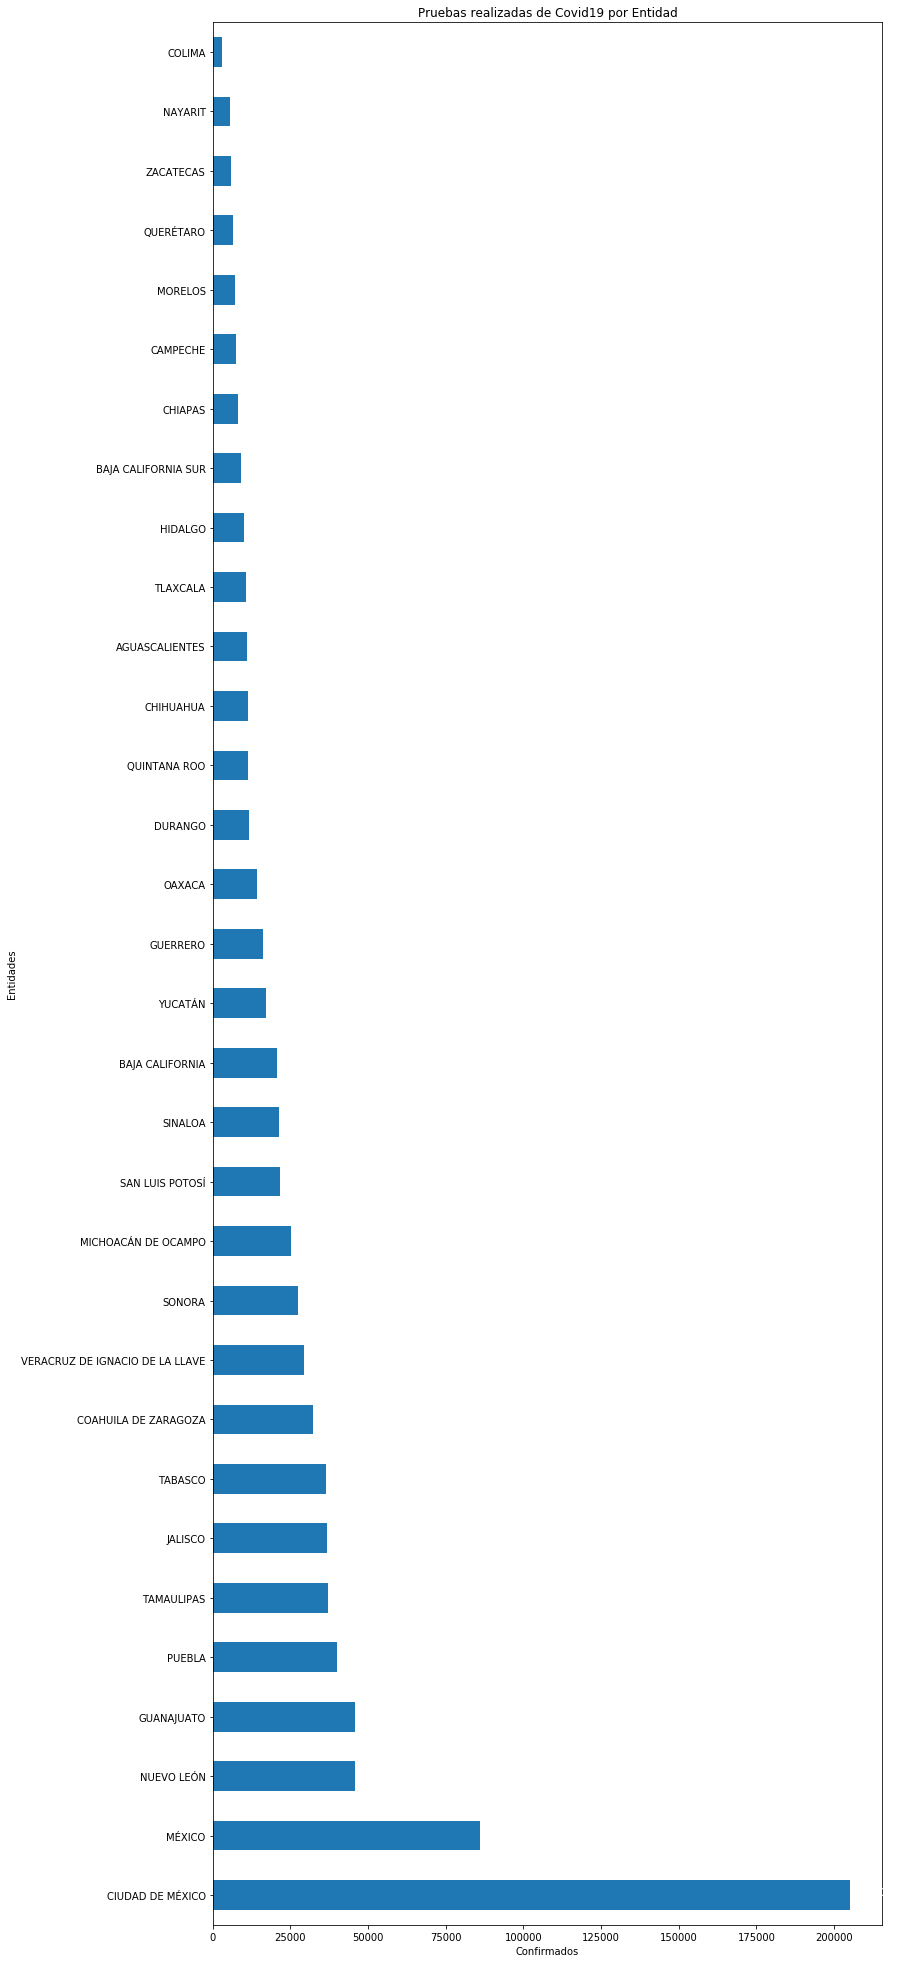

In [16]:
Casos_confirmados.plot(kind='barh', figsize= (12,35))
plt.title('Pruebas realizadas de Covid19 por Entidad')
plt.ylabel('Entidades')
plt.xlabel('Confirmados')
for index, value in enumerate(Casos_confirmados):
    label = format(int(value),',')
    plt.annotate(label,xy=(value,index),color='white')

**Con lo siguiente se muestran con sus respectivos valores**

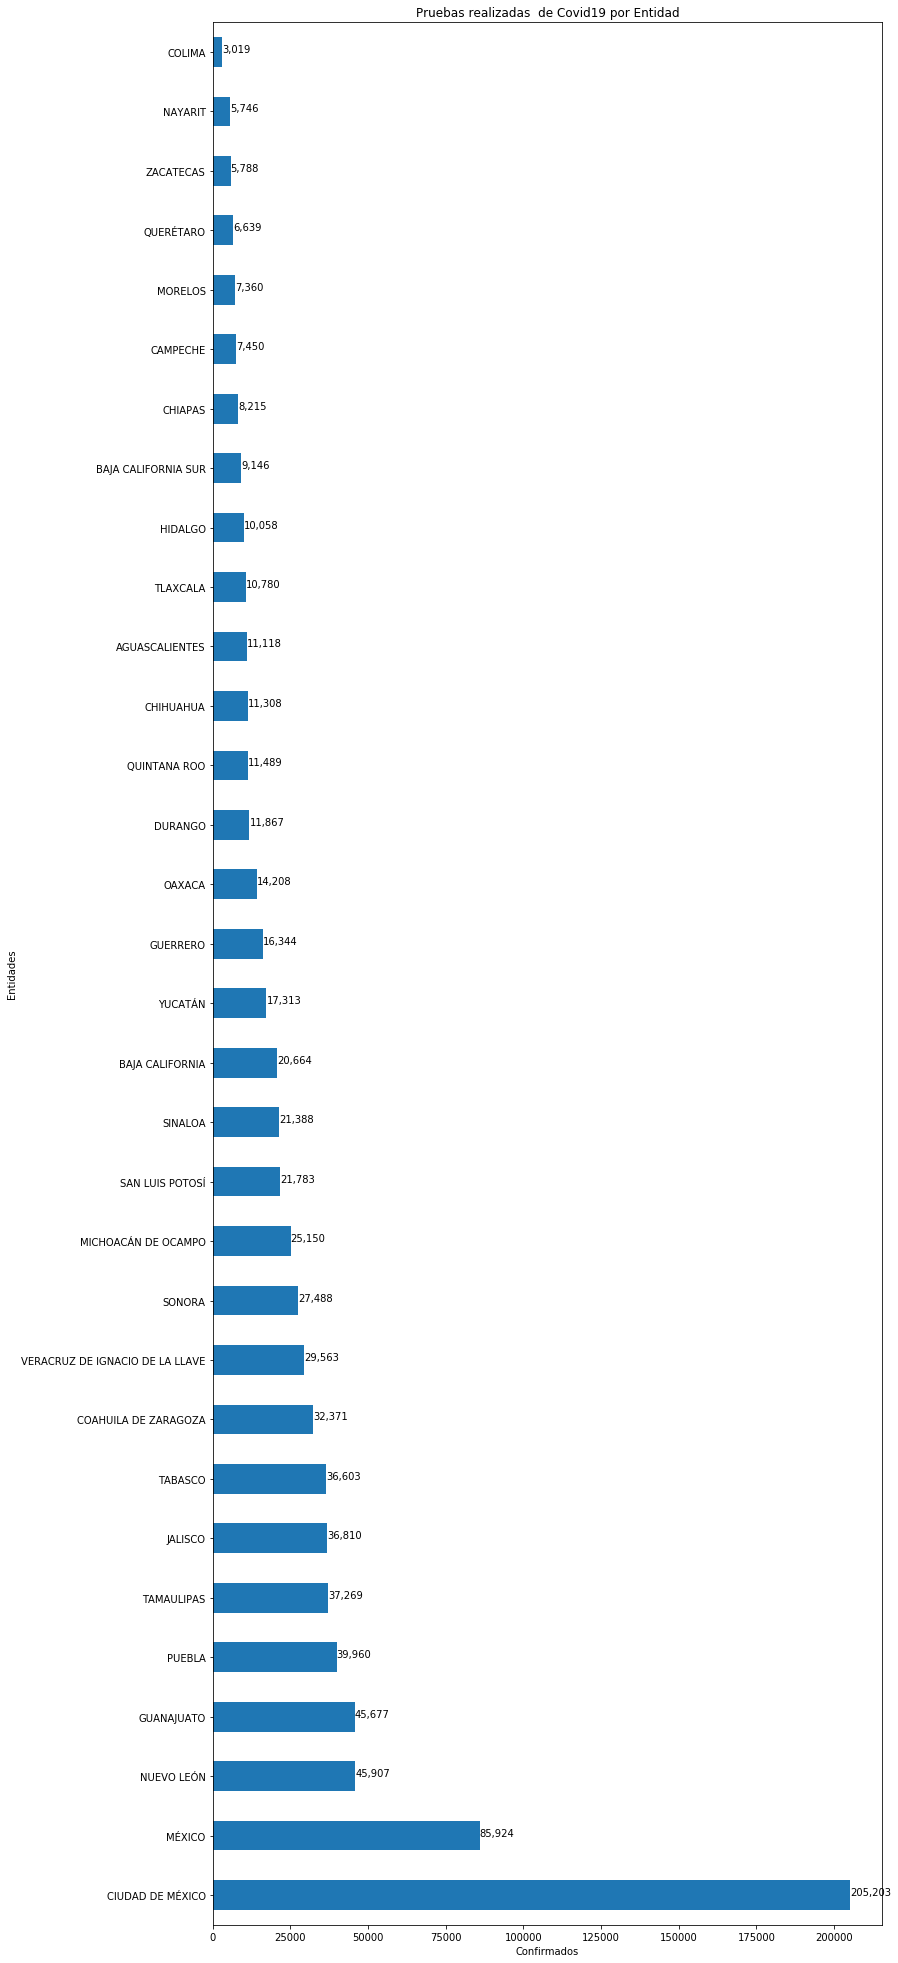

In [17]:
Casos_confirmados.plot(kind='barh', figsize= (12,35))
plt.title('Pruebas realizadas  de Covid19 por Entidad')
plt.ylabel('Entidades')
plt.xlabel('Confirmados')
for index, value in enumerate(Casos_confirmados):
    label = format(int(value),',')
    plt.annotate(label,xy=(value,index),color='black')

plt.show()

**Como ultima muestra de los datos quisimos mostrarlo con una grafica de pastel pero no resulto bien ya que no se ve muy legible la informacion**

In [18]:
df_positivos = data2.groupby('State',axis=0).sum()
df_positivos.head()

,Unnamed: 0,Age,Confirmed
State,,,
aguascalientes,1045447874,145352,3620
baja california,2729557977,589778,12533
baja california sur,1354693940,142370,3482
campeche,1117026067,176016,3845
chiapas,1043163994,264756,5547


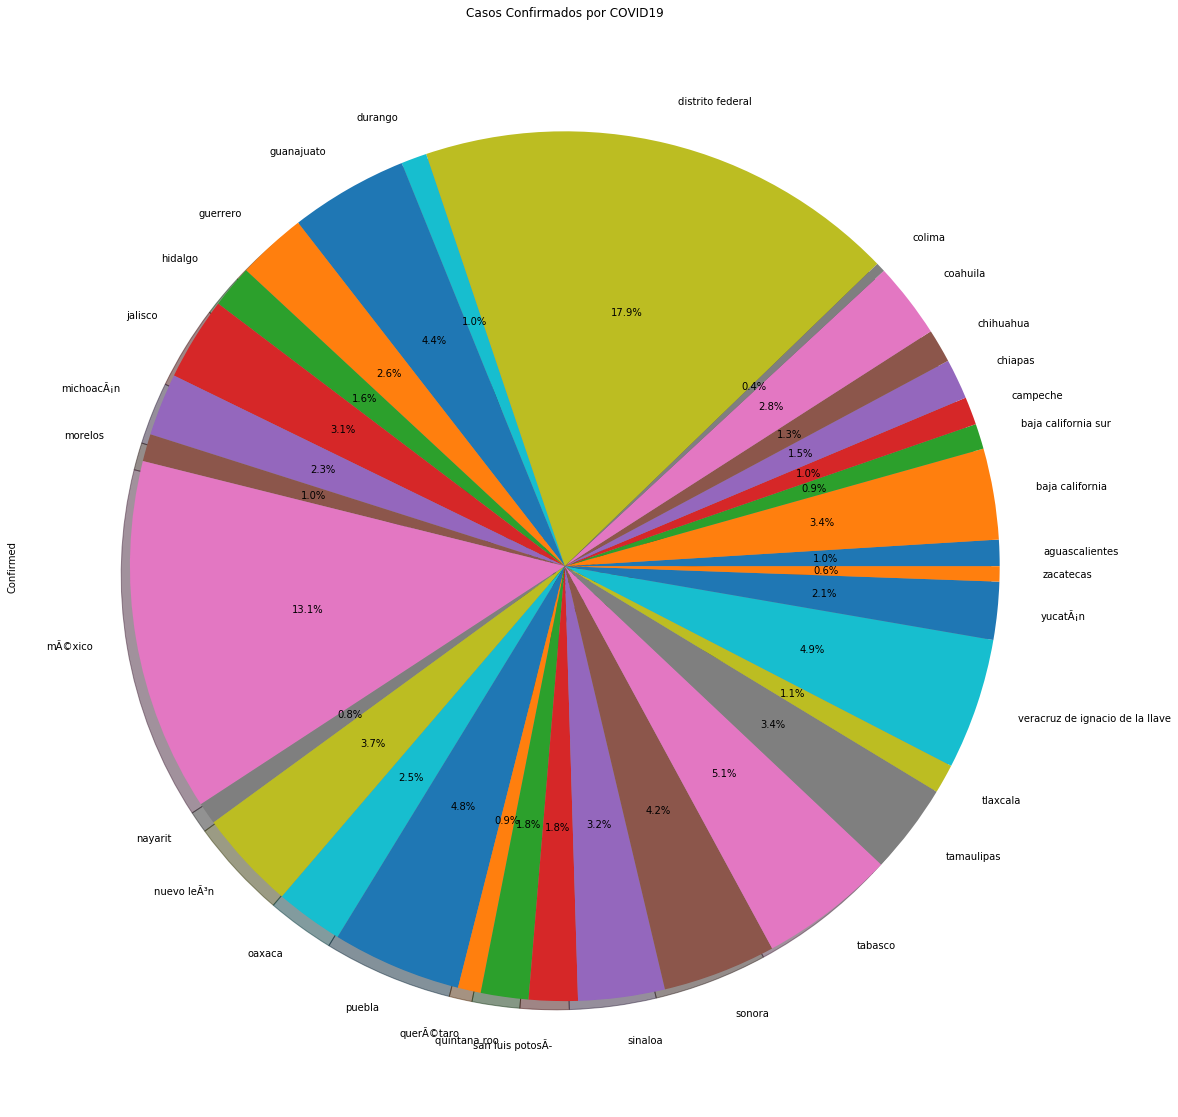

In [19]:
df_positivos['Confirmed'].plot(
    kind='pie',
    figsize = (100,20),
    autopct = '%1.1f%%',
    startangle=0,
    shadow = True
)
plt.title('Casos Confirmados por COVID19')
plt.show()

**En esta segunda parte realizaremos el analisis con los sectores**

**AHORA BIEN REALIMAZOS LA LISTA DE SECTORES PARA PODER CREAR LA COLUMNA SECTORES**

In [20]:
sectores= {
1: 'CRUZ ROJA',
2: 'DIF',
3: 'ESTATAL',
4: 'IMSS',
5: 'IMSS-BIENESTAR',
6: 'ISSTE',
7: 'MUNICIPAL',
8: 'PEMEX',
9: 'PRIVADA',
10: 'SEDENA',
11: 'SEMAR',
12: 'SSA',
13: 'UNIVERSITARIO',
99: 'NO ESPECIFICADO'
}

In [21]:
data['SECTORES'] = data['SECTOR'].map(sectores)

**VEMOS COMO SE CREA LA COLUMNA SECTORES EN NUESTRA TABLA**

In [22]:
data.head()

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,OTRA_CON,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI,ESTADOS,SECTORES
0,0,4,9,2,9,1,2020-03-23,2020-03-22,9999-99-99,97,...,2,2,2,2,2,99,1,97,CIUDAD DE MÉXICO,IMSS
1,1,4,9,2,9,2,2020-04-13,2020-04-04,9999-99-99,2,...,2,2,1,2,2,99,1,2,CIUDAD DE MÉXICO,IMSS
2,2,4,8,1,8,2,2020-04-15,2020-04-10,2020-04-19,2,...,2,2,1,2,2,99,1,2,CHIHUAHUA,IMSS
3,3,4,30,1,30,1,2020-04-27,2020-04-17,9999-99-99,97,...,1,2,2,2,2,99,1,97,VERACRUZ DE IGNACIO DE LA LLAVE,IMSS
4,4,3,15,2,15,2,2020-06-06,2020-06-01,9999-99-99,2,...,2,2,2,2,2,1,1,2,MÉXICO,ESTATAL


**EN ESTA PARTE SE REALIZA EL ANALISIS POR SECTORES CON ENFERMEDAD DE DEABETES Y QUE SE ENCUENTRAN ENTUBADOS PARA ESTE ANALISIS
SE ESTA TOMANDO EN CUENTA LAS SIGUIENTES COLUMNAS "SECTOR", "FECHA_DEF", "RESULTADO" Y "INTUBADO" para los cuales se usan para la evaluacion**

In [23]:
sectors = 'SECTOR.csv'
df_sector = pd.read_csv(sectors)


In [24]:
df_sector['TOTAL_SECTORES'] = [len(data.loc[(data['SECTOR'] == x) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull()) & (data['RESULTADO'] == 1)]) for x in list(df_sector['CLAVE'])]
df_sector['TOTAL_DIABETE_Y_INTUBADO'] = [len(data.loc[(data['SECTOR'] == x) & (data['FECHA_DEF'] != '9999-99-99') & (data.FECHA_DEF.notnull()) & ((data['RESULTADO'] == 1) | (data['DIABETES'] == 1) | (data['INTUBADO'] == 1))]) for x in list(df_sector['CLAVE'])]
porcent = 100

In [25]:
df_sector.head()

,CLAVE,DESCRIPCION,TOTAL_SECTORES,TOTAL_DIABETE_Y_INTUBADO
0,1,CRUZ ROJA,3,3
1,2,DIF,0,2
2,3,ESTATAL,974,1079
3,4,IMSS,23147,26158
4,5,IMSS-BIENESTAR,0,0


**UNA VEZ ECHO EL ANALISIS SE MOSTRARA EN UNA GRAFICA DE BARRAS EL RESULTADO**

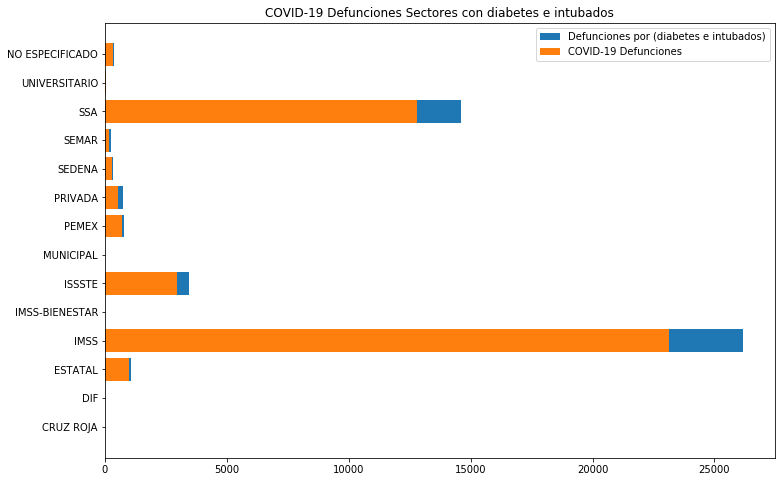

In [26]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('COVID-19 Defunciones Sectores con diabetes e intubados')
ax1.barh(df_sector['DESCRIPCION'], df_sector['TOTAL_DIABETE_Y_INTUBADO']*(porcent/100), align='center', label="Defunciones por (diabetes e intubados)")

ax1.barh(df_sector['DESCRIPCION'], df_sector['TOTAL_SECTORES'], align='center', label="COVID-19 Defunciones")

ax1.legend()


**UNA VEZ ECHO EL ANALISIS CON LOS SECTORES HARA CON ESTO PODEMOS REALIZAR ESTO CON LOS ESTADOS Y SUS RESPECTIVOS SECTORES**

In [27]:
Casos_sectores = data.groupby('ESTADOS')['SECTORES'].value_counts()

Casos_sectores.head()

ESTADOS          SECTORES
AGUASCALIENTES   SSA         6912
                 IMSS        3790
                 ISSTE        392
                 PRIVADA       24
BAJA CALIFORNIA  IMSS        9551
Name: SECTORES, dtype: int64

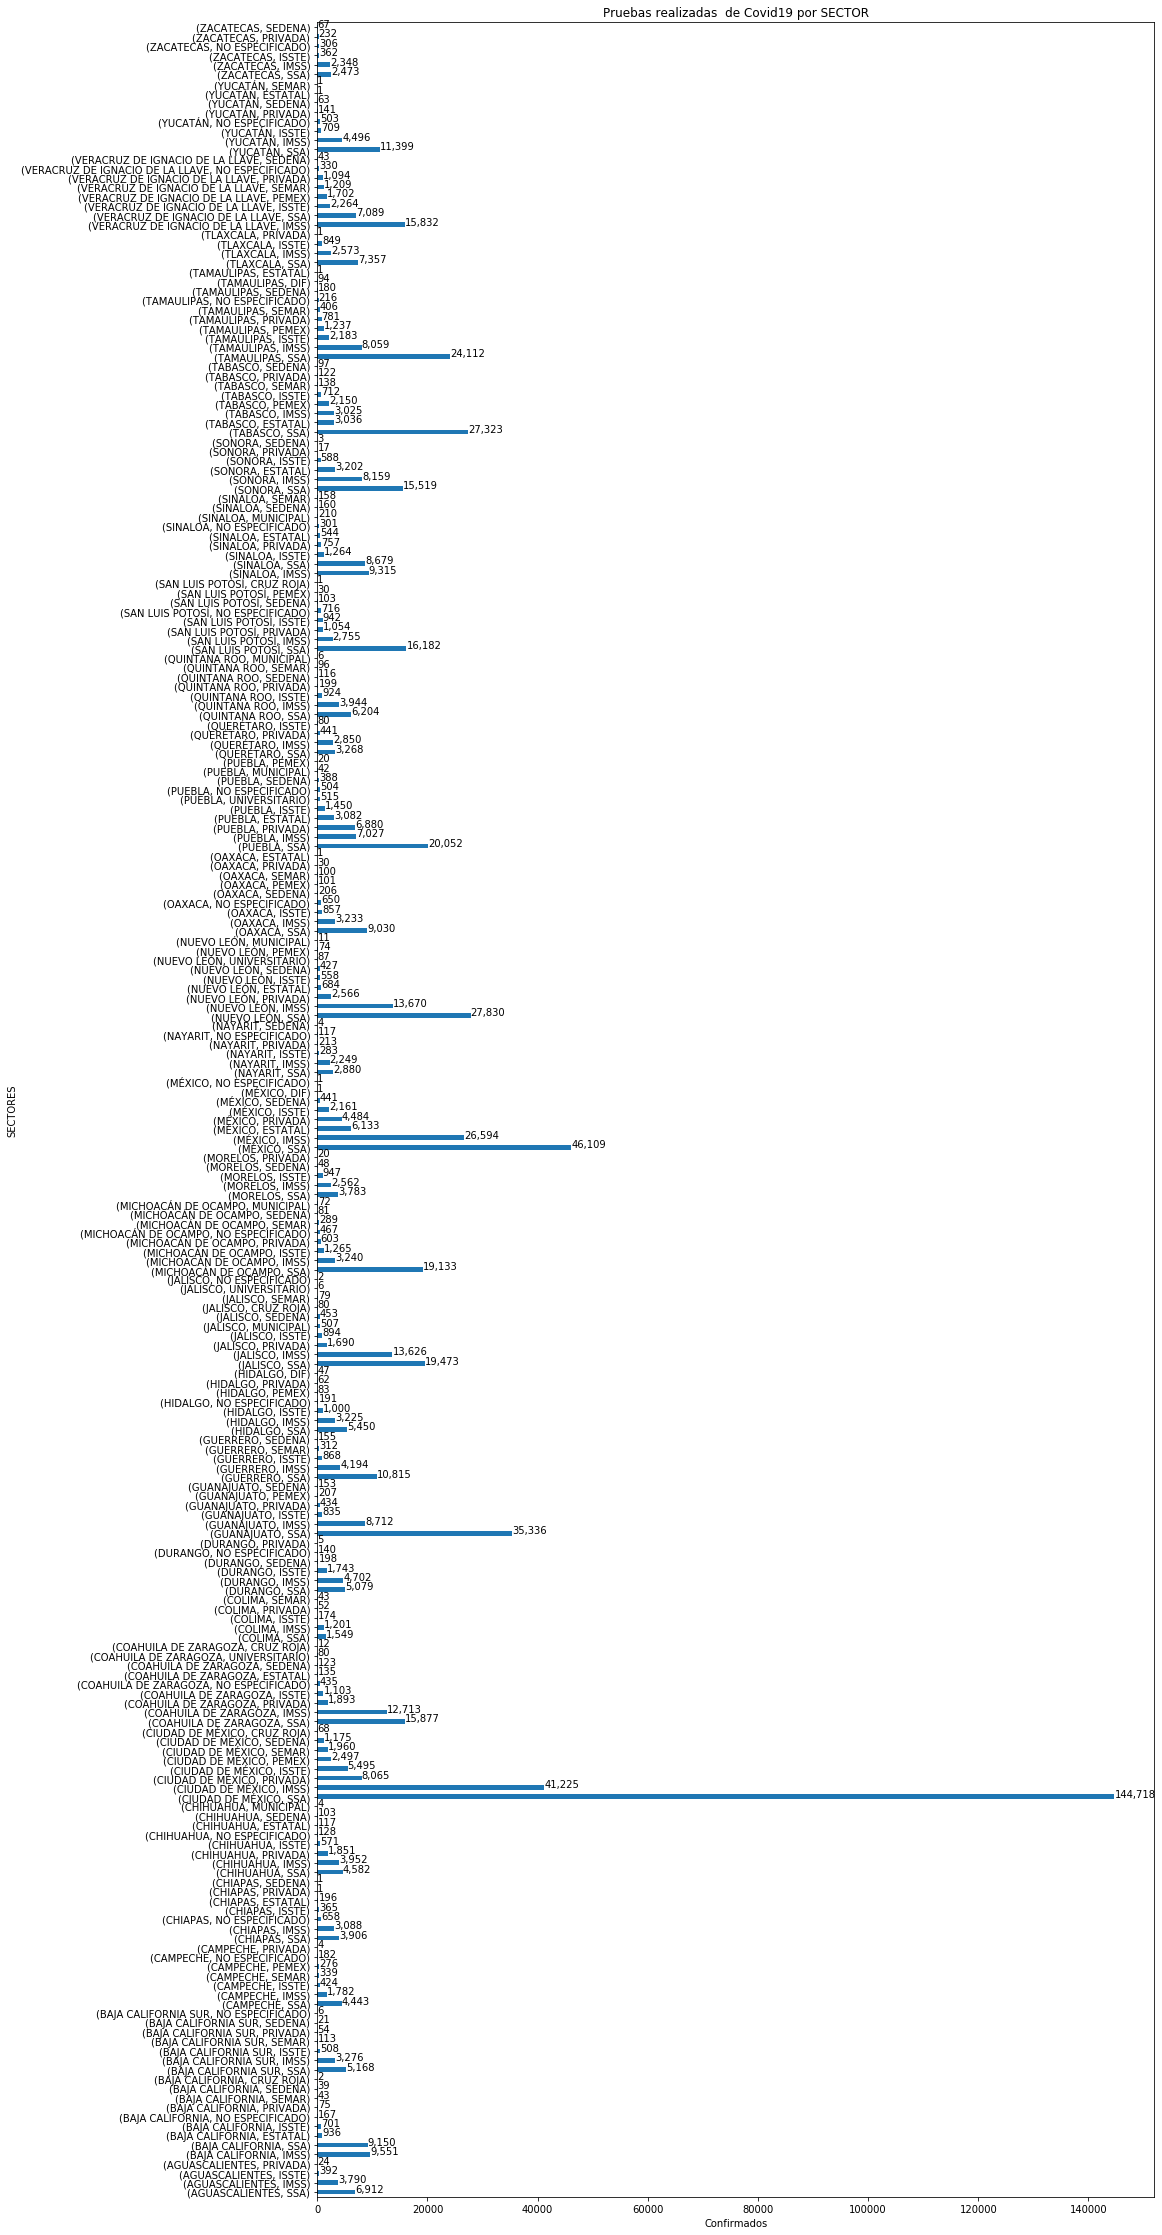

In [28]:
Casos_sectores.plot(kind='barh', figsize= (15,40))
plt.title('Pruebas realizadas  de Covid19 por SECTOR')
plt.ylabel('SECTORES')
plt.xlabel('Confirmados')
for index, value in enumerate(Casos_sectores):
    label = format(int(value),',')
    plt.annotate(label,xy=(value,index),color='black')

plt.show()

**COMO PODEMOS OBSERVAR NOS ARROJO TODOS LOS ESTADOS CON LOS CASOS DE COVID EN SUS RESPECTIVOS SECTORES**

**EN ESTA TERCERA PARTE VAMOS A REALIZAR UN ANALISIS CON EL SEXO PARA SABER SI LOS HOMBRES SON MAS AFECTADOS POR ESTE VIRUS**

In [29]:
tipo_sexo= {
1: 'MUJER',
2: 'HOMBRE',
99: 'NO ESPECIFICADO'
}

In [30]:
data['TIPO_SEXO'] = data['SEXO'].map(tipo_sexo)

In [31]:
data.head()

,Unnamed: 0,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI,ESTADOS,SECTORES,TIPO_SEXO
0,0,4,9,2,9,1,2020-03-23,2020-03-22,9999-99-99,97,...,2,2,2,2,99,1,97,CIUDAD DE MÉXICO,IMSS,HOMBRE
1,1,4,9,2,9,2,2020-04-13,2020-04-04,9999-99-99,2,...,2,1,2,2,99,1,2,CIUDAD DE MÉXICO,IMSS,HOMBRE
2,2,4,8,1,8,2,2020-04-15,2020-04-10,2020-04-19,2,...,2,1,2,2,99,1,2,CHIHUAHUA,IMSS,MUJER
3,3,4,30,1,30,1,2020-04-27,2020-04-17,9999-99-99,97,...,2,2,2,2,99,1,97,VERACRUZ DE IGNACIO DE LA LLAVE,IMSS,MUJER
4,4,3,15,2,15,2,2020-06-06,2020-06-01,9999-99-99,2,...,2,2,2,2,1,1,2,MÉXICO,ESTATAL,HOMBRE


In [32]:
positivos = data[data.RESULTADO == 1]

In [33]:
tipo = positivos['TIPOS_PACIENTE'].value_counts()
tipo

KeyError: 'TIPOS_PACIENTE'

In [ ]:
genero = positivos['TIPO_SEXO'].value_counts()
genero

In [ ]:
tipo_paciente= {
1: 'HAMBULATORIO',
2: 'HOSPITALIZADO',
99: 'NO ESPECIFICADO'
}

In [ ]:
data['TIPOS_PACIENTE'] = data['TIPO_PACIENTE'].map(tipo_paciente)

In [ ]:
data.head()

In [ ]:
pctg = [100/480278*n for n in genero]

pctt= [100/480278*n for n in tipo]

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

labelsg = 'Hombres', 'Mujeres'
labelst = 'Ambulatorios', 'Hospitalizados'

ax[0].pie(pctg, labels=labelsg, autopct='%1.2f%%')
ax[1].pie(pctt, labels=labelst, autopct='%1.2f%%')

**Ahora como plus en esta practica agregaremos lo que se realizo en la materia inteligencia artificial arboles de desicion que fue calcular los que sobrevivieron y los que fallecieron**

In [ ]:
data['Superviviente'] = data['FECHA_DEF'].apply(lambda fecha: 1 if fecha=='9999-99-99' else 0)

**En el siguiente codigo vamos a observar ya datos numericos en "FECHA_DEF"**

In [ ]:
data.head()

**Paso 3: Aplicacion de arbol de decisiones**

In [ ]:
y_target = data["Superviviente"].values

In [ ]:
columns = ["INTUBADO","NEUMONIA", "UCI", "TIPO_PACIENTE","EDAD","SEXO"]
X_input = data[list(columns)].values

In [ ]:
from sklearn import tree
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf_train = clf_train.fit(X_input, y_target)

**Evaluacion del Modelo**

In [ ]:
clf_train.score(X_input,y_target)

**Paso 4: Visualizar el árbol con datos de si sobrevivio o no sobrevivio**

In [ ]:
clasificacion = ['Estado vivo','Estado no vivo']

In [ ]:
from sklearn.externals.six import StringIO
with open("covid.dot", 'w') as f:
    f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns,
                          class_names=clasificacion)

**Creacion de la imagen**

In [ ]:
!dot -Tpng covid.dot -o covid.png

In [ ]:
from IPython.display import Image

#display the decison tree graphic
Image("covid.png")

**Arbol de decision con diseño y color**

In [ ]:

import graphviz
dot_data = tree.export_graphviz(
    clf_train,
    out_file = None,
    class_names = clasificacion,
    
    feature_names = columns,
    filled= True,
    rounded= True,
    special_characters = True
)
graph = graphviz.Source(dot_data)
graph.render('CovidColor1',format='png')
graph